<a href="https://colab.research.google.com/github/OshadaWeerasiri/Pandas-Pipeline/blob/main/Pandas_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('Online Sales Data.csv')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [ ]:
#Data Cleaning
df = df.drop_duplicates()
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
#Convert types
df['Product Category'] = df['Product Category'].astype('str')
df['Product Name'] = df['Product Name'].astype('str')
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#Data Analysis
df['month'] = df['Date'].dt.month
new_df = df.groupby('month')['Units Sold'].mean()

<Axes: title={'center': 'Average Units Sold by Month'}, xlabel='month'>

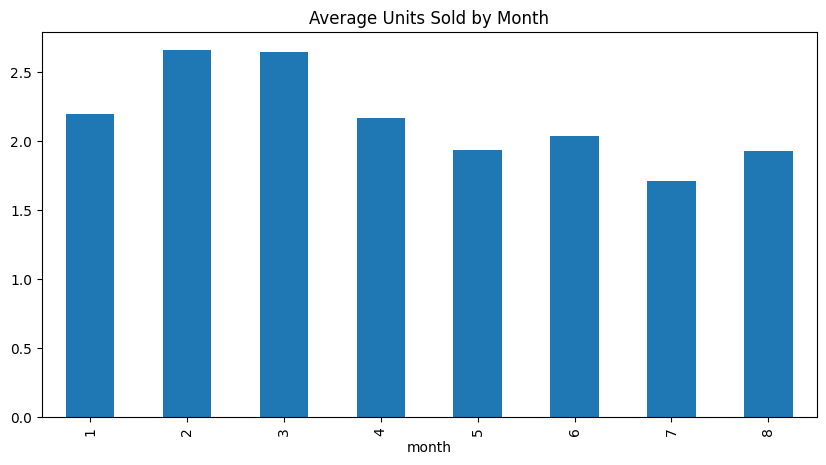

In [ ]:
#Data Visualization
new_df.plot(kind='bar', figsize=(10, 5), title='Average Units Sold by Month')

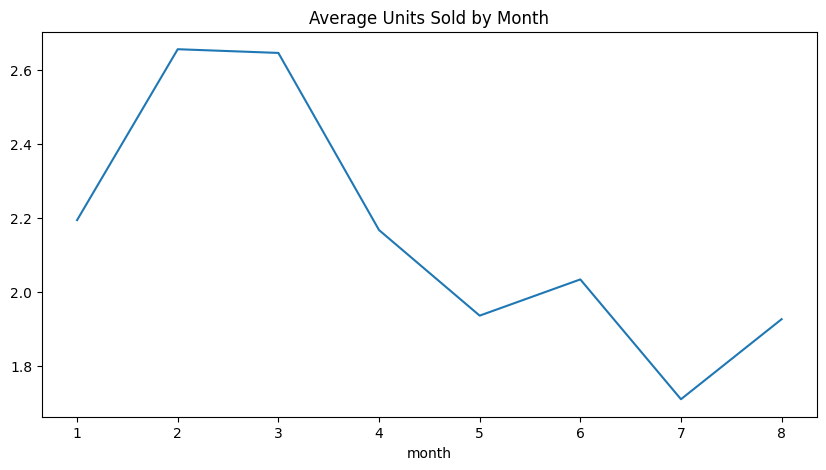

In [ ]:
def load_data(path):
  return pd.read_csv(path)

def data_cleaning(data):
  data = data.drop_duplicates()
  data = data.dropna()
  data = data.reset_index(drop=True)
  return data

def convert_dtypes(data,types_dict=None):
  data = data.astype(dtype=types_dict)
  ##convert the date column to datetime
  data['Date'] = pd.to_datetime(data['Date'])
  return data

def data_analysis(data):
  data['month'] = data['Date'].dt.month
  new_df = data.groupby('month')['Units Sold'].mean()
  return new_df

def data_visualization(new_df,vis_type='bar'):
  new_df.plot(kind=vis_type, figsize=(10, 5), title='Average Units Sold by Month')
  return new_df

def data_visualization(data,kind):
  data.plot(kind=kind, figsize=(10, 5), title='Average Units Sold by Month')
path = "Online Sales Data.csv"
df = (pd.DataFrame()
.pipe(lambda x: load_data(path))
.pipe(data_cleaning)
.pipe(convert_dtypes,{'Product Category': 'str', 'Product Name': 'str',})
.pipe(data_analysis)
.pipe(data_visualization,'line')
)